In [1]:
!pip install -q git+https://github.com/yupbank/zonotope_enum.git

/Users/pengyu/.local/lib/python3.6/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yupbank/zonotope_enum/blob/master/demo.ipynb)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from zonotope_enum import enum
from itertools import product
from scipy.spatial import ConvexHull

In [3]:
def naive(gs):
  per = np.array([i for i in product([0, 1], repeat=gs.shape[0])])
  all_points = per.dot(gs)
  hull = ConvexHull(all_points)
  return all_points[hull.vertices], all_points, hull 

def draw_naive(gs, color='g', label='naive'):
  vertices, all_points, hull = naive(gs)
  for ss in hull.simplices:
    ss = np.append(ss, ss[0])  # Here we cycle back to the first coordinate
    plt.plot(all_points[ss, 0], all_points[ss, 1], c=color)
  plt.plot([],[], c=color,  label=label)
  plt.scatter(vertices[:, 0], vertices[:, 1], c=color, label='%s_hull'%label)


def draw_enum(gs, color='r', label='zonotope_enum'):
    vs = enum(gs)
    plt.scatter(vs[:, 0], vs[:, 1], label=label, c=color)

In [4]:
np.random.seed(10)

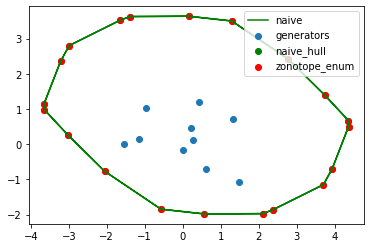

In [5]:
gs = np.random.randn(10, 2)
plt.scatter(gs[:,0], gs[:, 1], label='generators')
draw_naive(gs)
draw_enum(gs)
plt.legend()

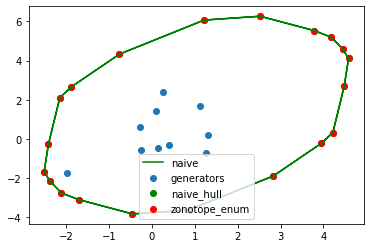

In [6]:
gs = np.random.randn(10, 2)
plt.scatter(gs[:,0], gs[:, 1], label='generators')
draw_naive(gs)
draw_enum(gs)
plt.legend()

In [7]:
gs = np.random.randn(12, 2)
%timeit naive(gs)
%timeit enum(gs)


4.78 ms ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
629 µs ± 7.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
gs = np.random.randn(15, 2)
%timeit naive(gs)
%timeit enum(gs)


49.8 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
747 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
gs = np.random.randn(17, 2)
%timeit naive(gs)
%timeit enum(gs)


223 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
751 µs ± 7.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
gs = np.random.randn(18, 2)
%timeit naive(gs)
%timeit enum(gs)


459 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
838 µs ± 3.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
gs = np.random.randn(20, 2)
%timeit naive(gs)
%timeit enum(gs)

2.07 s ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
805 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
gs = np.random.randn(200, 2)
%timeit enum(gs)

4.99 ms ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
gs = np.random.randn(2000, 2)
%timeit enum(gs)

46.8 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
gs = np.random.randn(10000, 2)
%timeit enum(gs)

236 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
gs = np.random.randn(20000, 2)
%timeit enum(gs)

470 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
gs = np.random.randn(200000, 2)
%timeit enum(gs)

4.85 s ± 61.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


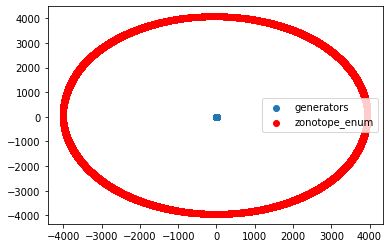

In [17]:
gs = np.random.randn(10000, 2)
plt.scatter(gs[:,0], gs[:, 1], label='generators')
draw_enum(gs)
plt.legend()